--- 1. Data Loading ---
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']
------------------------------
--- 2. Data Preprocessing ---
Missing values check: No missing values found (Standard Iris dataset is clean).
Label Encoding: Already handled (Species are encoded as 0, 1, 2).
Training set size: 105 samples
Testing set size: 45 samples
------------------------------
--- 3. Model Training ---
Decision Tree Classifier training complete.
------------------------------
--- 4. Model Prediction and Evaluation ---
1. Accuracy Score: 0.9333

2. Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93 

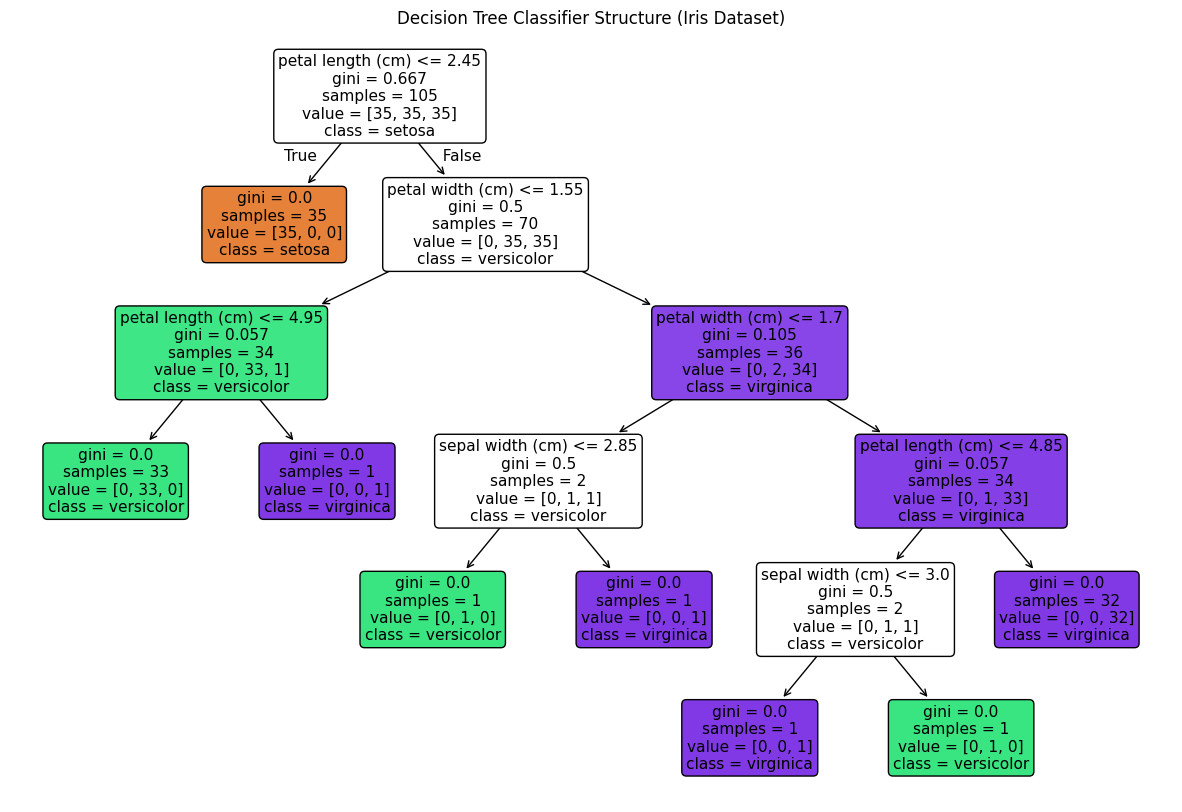

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# --- 1. Load the Dataset ---
print("--- 1. Data Loading ---")
iris = load_iris(as_frame=True) 

# Separate features (X) and target (y)
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Features: {iris.feature_names}")
print(f"Target Classes: {target_names}")
print("-" * 30)

# --- 2. Preprocess the Data ---
print("--- 2. Data Preprocessing ---")

# A. Handle Missing Values:
if X.isnull().sum().any():
    print("Warning: Missing values detected. Imputing...")
else:
    print("Missing values check: No missing values found (Standard Iris dataset is clean).")

# B. Encode Labels:
print("Label Encoding: Already handled (Species are encoded as 0, 1, 2).")

# C. Split the Data:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # stratify ensures equal class proportion in splits
)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("-" * 30)

# --- 3. Train the Decision Tree Classifier ---
print("--- 3. Model Training ---")

# Initialize the Decision Tree Classifier
# We set random_state for reproducibility
# You could experiment with 'max_depth' to prevent overfitting
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

print("Decision Tree Classifier training complete.")
print("-" * 30)

# --- 4. Prediction and Evaluation ---
print("--- 4. Model Prediction and Evaluation ---")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# A. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"1. Accuracy Score: {accuracy:.4f}")

# B. Precision, Recall, and F1-Score (Macro Average)
report = classification_report(y_test, y_pred, target_names=target_names)
print("\n2. Classification Report (Precision, Recall, F1-Score):")
print(report)

# C. Confusion Matrix (For deeper insight)
conf_matrix = confusion_matrix(y_test, y_pred)
print("3. Confusion Matrix:")
# Print the matrix with labels for clarity
conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)
print(conf_df)

print("-" * 30)

# Display a visual of the trained Decision Tree (Requires matplotlib)
print("Plotting the Decision Tree structure...")
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Classifier Structure (Iris Dataset)")
plt.show()